# Plate Theory

## Introduction

Plate theory quantifies the relationship between retention time and chromatographic peak width. In simple terms, the longer the retention time, the wider the peak. The concept of "theoretical plates," introduced by Martin and Synge in 1941 {cite}`Martin1941-sz`, is rooted in the structure of Pascal’s triangle, which illustrates particle distribution across discrete stages. This distribution follows the binomial theorem, and as the number of plates increases, it approaches a Gaussian distribution—representing the symmetric case.

In practice, peak shapes can be asymmetric due to various effects. Models such as EMG (Exponentially Modified Gaussian {cite}`Foley_1984` or {cite}`Kalambet2011-us`) and EGH (Exponentially Gaussian Hybrid {cite}`LAN2001`) can be used to fit asymmetric peaks.

## Basic Plate Theory

The basic plate theory relates the number of theoretical plates, $N$, to the retention time, $t_R$, and the standard deviation of the elution peak, $\sigma$, as follows:

$$ N = \frac{t_R^2}{\sigma^2} \qquad\qquad\qquad (1) $$

```{figure} ../../_static/images/theoretical_plates.png
:name: theoretical_plates

Theoretical Plates
```

This figure, based on Pascal’s triangle, visually connects the binomial distribution of particles to the concept of plates and the resulting Gaussian peak shape.

## Modified Formulae for Asymmetric Models

You can interpret the above formula as:

$$ N = \frac{t_R^2}{second \  central \  moment} \qquad\qquad\qquad (2) $$

Note that $t_R$ (retention time) is define as the mode of the elution peak. Also note that for a symmetric (Gaussian) model, $ t_R = mode = mean $. For asymmetric models, related parameters are as shown below:

| Model | Mode             |   Mean (first raw moment) |   $\bar{M_2}$ (second central moment)    |
| :---: | :--------------: | :------------:  |  :-------------:  |
| EMG   | very complicated [^1]   |   $ \mu + \tau $   |  $ \sigma^2 + \tau^2 $ |
| EGH   |   $t_R$  | $ t_R + \tau\epsilon_1 $ |  $ (\sigma^2 + \sigma\|\tau\| +\tau^2)\epsilon_2 $ |

For the extension of the basic plate theory to asymmetric models, let us consider only EGH model since we prefer to use it because of its "mathematical simplisity and numerical stability."
We can use one of the following.

$$  N \approx \frac{t_R^2}{(\sigma^2 + \sigma|\tau| +\tau^2)\epsilon_2} \qquad\qquad\qquad (3)  $$

$$  N \approx \frac{t_R^2}{\sigma^2 +\tau^2 - \sigma|\tau|/5.577 } \qquad\qquad\qquad (4)  $$

However, from the result below, the approxiamtion (4) {cite}`LAN2001` seems to work better, at least, in our supposed application range. 

[^1]: See [Exponentially modified Gaussian distribution](https://en.wikipedia.org/wiki/Exponentially_modified_Gaussian_distribution).

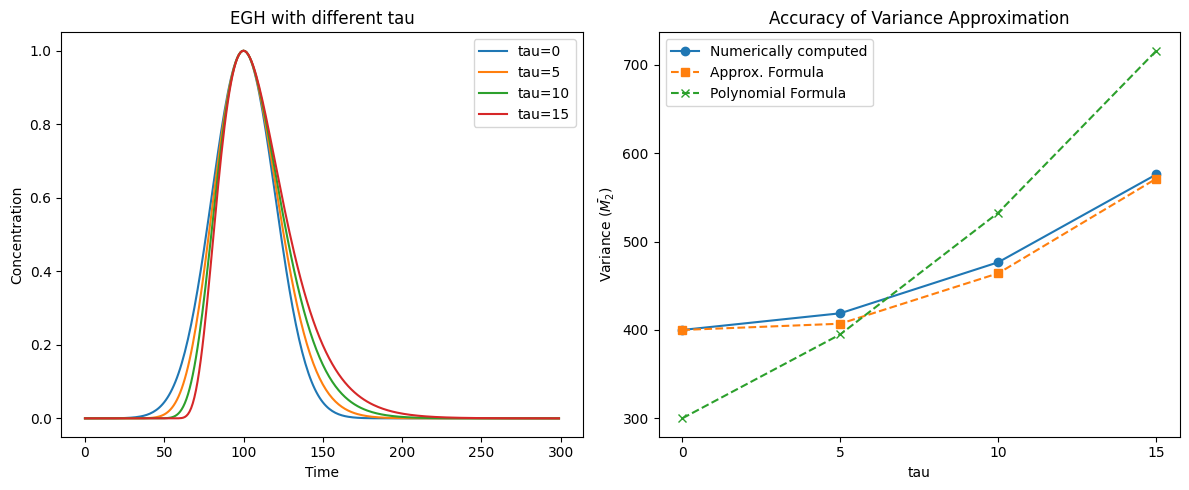

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from molass.SEC.Models.Simple import egh, e1
from molass.Stats.Moment import compute_meanstd
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
x = np.arange(300)

vars1 = []
vars2 = []
vars3 = []

tau_list = [0, 5, 10, 15]
for tau in tau_list:
    y = egh(x, 1, 100, 20, tau)
    ax1.plot(x, y, label=f'tau={tau}')
    mean, std = compute_meanstd(x, y)
    vars1.append(std**2)
    vars2.append(20**2 + tau**2 - 20*tau/5.577)
    theta = np.arctan(tau/20)
    vars3.append((20**2 + 20*tau + tau**2)*e1(theta))

ax1.set_title('EGH with different tau')
ax1.set_xlabel('Time')
ax1.set_ylabel('Concentration')
ax1.legend()

ax2.plot(tau_list, vars1, 'o-', label='Numerically computed')
ax2.plot(tau_list, vars2, 's--', label='Approx. Formula')
ax2.plot(tau_list, vars3, 'x--', label='Derived Formula')
ax2.set_title(r'Accuracy of Variance Approximation')
ax2.set_xlabel('tau')
ax2.set_ylabel(r'Variance ($\bar{M_2}$)')
ax2.set_xticks(tau_list)
ax2.set_xticklabels(tau_list)
ax2.legend()
fig.tight_layout()